# Simple Linear Regression

In [1]:
from warnings import filterwarnings
filterwarnings = "ignore"

## Step 1 - Read Dataset

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("50_Startups.csv")

In [4]:
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### UnderStanding relation ship between RND and PROFIT
### PROFIT ~ RND
### Profit_pred = B0+B1*RND

In [5]:
X = df[["RND"]]
Y = df[["PROFIT"]]

In [9]:
X.head().join(Y.head())


,RND,PROFIT
0,165349.20,192261.83
1,162597.70,191792.06
2,153441.51,191050.39
3,144372.41,182901.99
4,142107.34,166187.94


In [10]:
import seaborn as sns

<Axes: xlabel='RND', ylabel='PROFIT'>

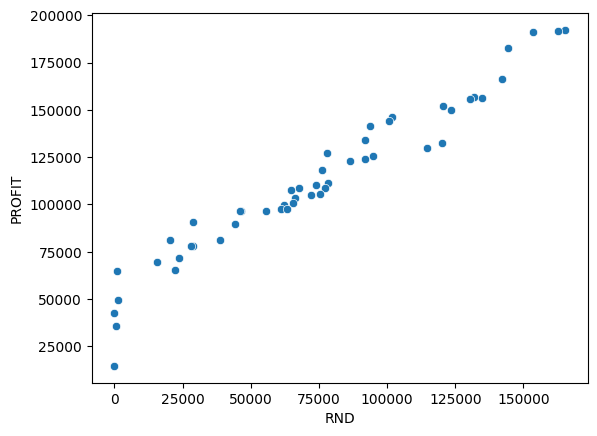

In [13]:
sns.scatterplot(data=df,x="RND",y="PROFIT")

### Step 3 - Perform Model Building

In [18]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

### Get Slope and Intercept

In [22]:
model.intercept_

array([49032.89914125])

In [23]:
model.coef_

array([[0.85429137]])

### Profit_pred = 49032.9 + 0.8543*RND

<Axes: xlabel='RND', ylabel='PROFIT'>

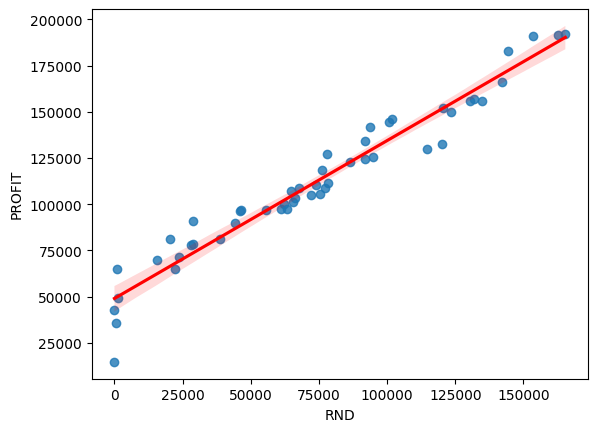

In [16]:
sns.regplot(data=df, x="RND", y= "PROFIT", line_kws={"color":"RED"})

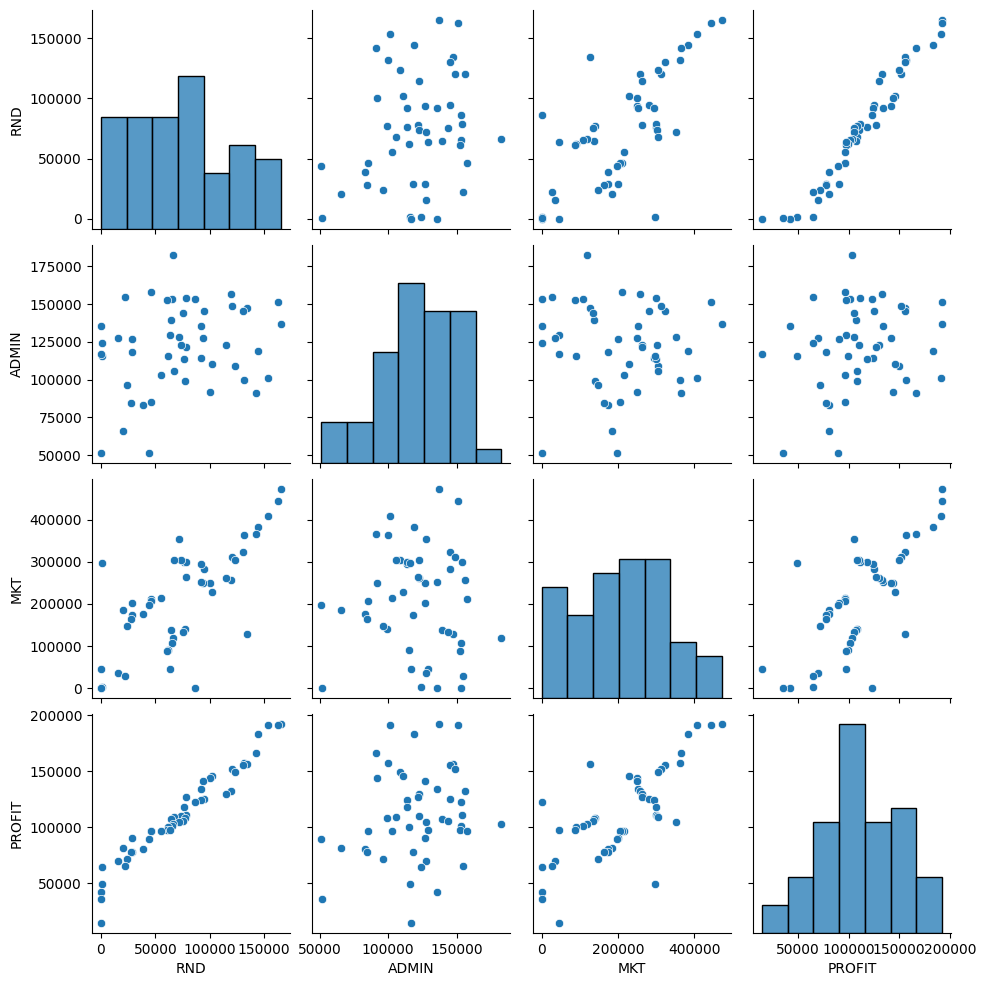

In [14]:
sns.pairplot(data=df)

In [26]:
ypred = model.predict(X)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [27]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## Model Evaluation
1. Root Mean Square Error
2. Mean Absolute Error
3. Mean Absolute Percentage Error
4. R2 Score

In [17]:
from sklearn.metrics import(
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [31]:
def evaluate_model(model,x,y):
    #Predict the results from x
    ypred = model.predict(x)
    #Evaluate the metrics
    rmse = root_mean_squared_error(y,ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y,ypred)
    R2 = r2_score(y,ypred)
    #print the metrics
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:2f}")
    print(f"MAPE : {mape:.4f}")
    print(f"R2 Score : {R2:.4f}")

In [32]:
evaluate_model(model,X,Y)

RMSE : 9226.10
MAE : 6910.984355
MAPE : 0.1107
R2 Score : 0.9465


#### Above R2 Score is 09465 which is >0.8 hence we can it a good model and can be used for out of sample predictions

## Out of Sample Prediction

In [33]:
X.values[0:5]

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34]])

In [37]:
rnd = [[150000]]
model.predict(rnd)

d:\Data Science\Machine Learning\ML GitTest\Machine-Learning-Ravi\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[177176.60478207]])

### Out of sample is predicted by formula
### Profit_pred = 49032.9 + 0.8543*RND

## Conclusion
### If RND increases by 1 unit Profit will increase by 0.8543
### If RND increase by 1000 , Profit will increase by 854.3